In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [47]:
customers = pd.read_csv("Ecommerce Customers")

In [48]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [49]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [51]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis

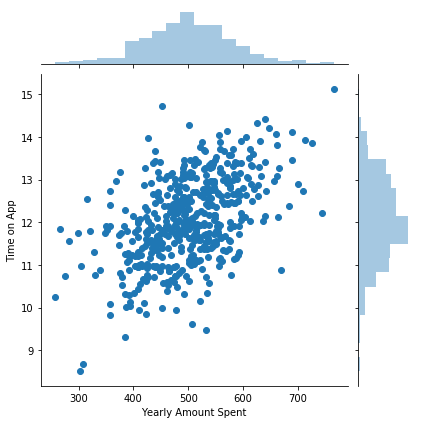

In [52]:
sns.jointplot(x='Yearly Amount Spent',y='Time on App',data=customers)

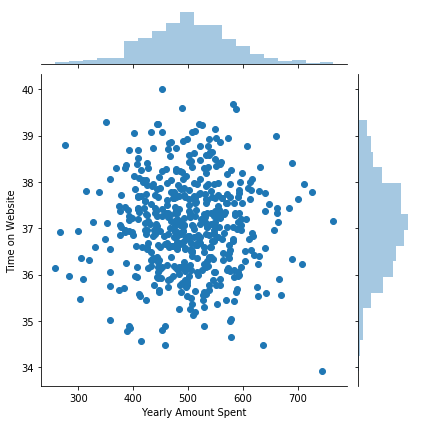

In [53]:
sns.jointplot(x='Yearly Amount Spent',y='Time on Website',data=customers)

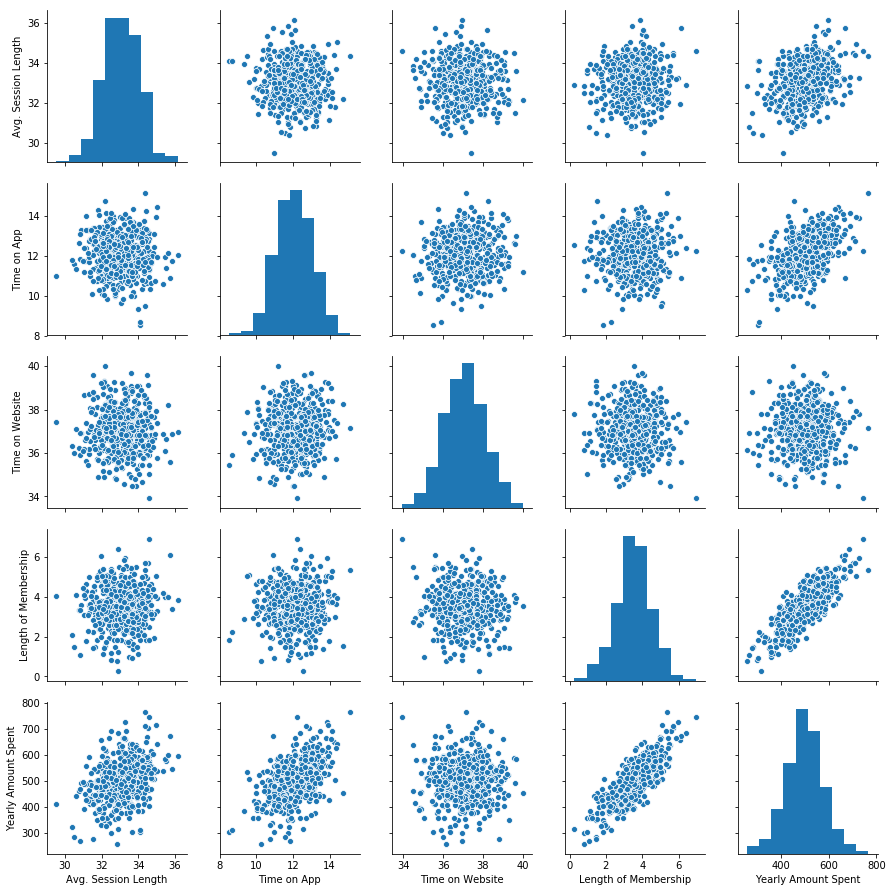

In [54]:
sns.pairplot(customers)

In [55]:
customers.drop(['Email','Address','Avatar'],inplace=True,axis=1)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

 - Length of Membership

# **Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

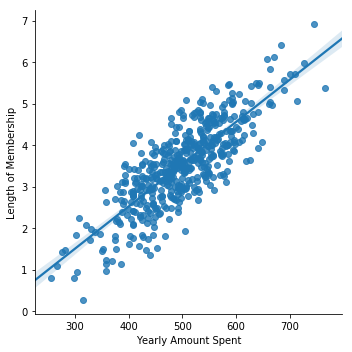

In [56]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = customers.drop('Yearly Amount Spent',axis=1)
y = customers['Yearly Amount Spent']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [64]:
model.coef_

array([25.41604197, 38.48171869,  0.92577581, 61.94745709])

In [65]:
model.intercept_

-1057.7053491019208

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [66]:
prediction = model.predict(x_test)

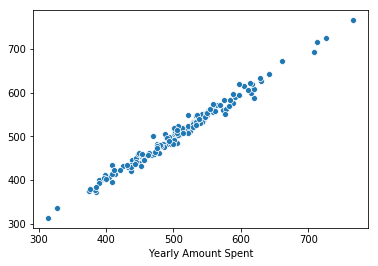

In [67]:
sns.scatterplot(y_test,prediction)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [69]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,prediction))
print(metrics.mean_squared_error(y_test,prediction))
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

7.738260947974368
100.40030998590946
10.019995508277908


## Conclusion

In [73]:
pd.DataFrame(model.coef_,x.columns,columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.416042
Time on App,38.481719
Time on Website,0.925776
Length of Membership,61.947457


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.42 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.48 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.92 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.94 total dollars spent**.